<a href="https://colab.research.google.com/github/kik2025/CarrerPath.io/blob/main/Erika_Sustainable_AI_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Instalar las librerías que necesitamos
!pip install pandas matplotlib seaborn plotly nbformat

print("✅ Todas las herramientas instaladas correctamente")
print("🚀 ¡Lista para analizar datos!")

✅ Todas las herramientas instaladas correctamente
🚀 ¡Lista para analizar datos!


In [4]:
# ===== ERIKA'S SUSTAINABLE AI EDUCATION PROJECT =====
# Part II: Data Analysis and Bias Mitigation

# Importar todas las herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Configurar para que los gráficos se vean bonitos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🎯 Proyecto: Carbon-Efficient AI for Sustainable Education")
print("👩‍🎓 Estudiante: Erika Rocha Berthely")
print("📅 Fecha:", datetime.now().strftime("%Y-%m-%d"))
print("\n✅ Todas las librerías importadas correctamente")
print("🚀 ¡Lista para empezar el análisis!")

🎯 Proyecto: Carbon-Efficient AI for Sustainable Education
👩‍🎓 Estudiante: Erika Rocha Berthely
📅 Fecha: 2025-07-26

✅ Todas las librerías importadas correctamente
🚀 ¡Lista para empezar el análisis!


In [5]:
# ===== 1. DATA COLLECTION & EXPLORATION =====

# Crear datos simulados de educación global (como los reales de UNESCO)
np.random.seed(42)  # Para que siempre salgan los mismos números

# Países y regiones
countries = ['España', 'Francia', 'Alemania', 'Brasil', 'India', 'Nigeria',
            'Japón', 'México', 'Kenia', 'Bangladesh']
regions = ['Europa', 'Europa', 'Europa', 'América', 'Asia', 'África',
          'Asia', 'América', 'África', 'Asia']

# Crear dataset simulado
data = []
for i, country in enumerate(countries):
    for gender in ['Male', 'Female']:
        for area in ['Urban', 'Rural']:
            # Simular diferentes niveles de acceso según la región
            base_literacy = 95 if regions[i] in ['Europa', 'Asia'] else 80
            base_digital = 90 if regions[i] in ['Europa', 'Asia'] else 60

            # Añadir variaciones realistas
            literacy_rate = base_literacy + np.random.normal(0, 5)
            digital_access = base_digital + np.random.normal(0, 10)
            completion_rate = (literacy_rate + digital_access) / 2 + np.random.normal(0, 3)

            # Simular bias: rural y mujeres tienen menos acceso
            if area == 'Rural':
                literacy_rate -= 10
                digital_access -= 15
                completion_rate -= 8
            if gender == 'Female' and regions[i] == 'África':
                literacy_rate -= 5
                completion_rate -= 3

            # Asegurar que estén en rangos realistas
            literacy_rate = max(40, min(99, literacy_rate))
            digital_access = max(20, min(95, digital_access))
            completion_rate = max(30, min(95, completion_rate))

            data.append({
                'Country': country,
                'Region': regions[i],
                'Gender': gender,
                'Area': area,
                'Literacy_Rate': round(literacy_rate, 1),
                'Digital_Access': round(digital_access, 1),
                'Completion_Rate': round(completion_rate, 1),
                'GDP_Level': 'High' if regions[i] == 'Europa' else 'Medium' if regions[i] == 'Asia' else 'Low'
            })

# Convertir a DataFrame (tabla de trabajo)
df = pd.DataFrame(data)

print("📊 Dataset creado exitosamente!")
print(f"📈 Total de registros: {len(df)}")
print(f"🌍 Países incluidos: {len(df['Country'].unique())}")
print(f"📋 Variables analizadas: {list(df.columns)}")
print("\n👀 Primeras 5 filas:")
df.head()

📊 Dataset creado exitosamente!
📈 Total de registros: 40
🌍 Países incluidos: 10
📋 Variables analizadas: ['Country', 'Region', 'Gender', 'Area', 'Literacy_Rate', 'Digital_Access', 'Completion_Rate', 'GDP_Level']

👀 Primeras 5 filas:


,Country,Region,Gender,Area,Literacy_Rate,Digital_Access,Completion_Rate,GDP_Level
0,España,Europa,Male,Urban,97.5,88.6,95.0,High
1,España,Europa,Male,Rural,92.6,72.7,86.4,High
2,España,Europa,Female,Urban,99.0,95.0,95.0,High
3,España,Europa,Female,Rural,87.7,70.4,82.1,High
4,Francia,Europa,Male,Urban,96.2,70.9,78.4,High


In [6]:
# ===== EXPLORATORY DATA ANALYSIS =====

# 1. Resumen estadístico
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe())

print("\n📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS")
print("="*50)
print("Por Región:")
print(df['Region'].value_counts())
print("\nPor Género:")
print(df['Gender'].value_counts())
print("\nPor Área:")
print(df['Area'].value_counts())

📊 ESTADÍSTICAS DESCRIPTIVAS
       Literacy_Rate  Digital_Access  Completion_Rate
count      40.000000       40.000000        40.000000
mean       83.157500       69.405000        78.160000
std        10.635087       17.764585        12.683662
min        61.800000       30.800000        53.100000
25%        75.650000       56.500000        67.000000
50%        83.300000       70.250000        81.800000
75%        92.375000       84.000000        88.225000
max        99.000000       95.000000        95.000000

📍 DISTRIBUCIÓN POR VARIABLES CATEGÓRICAS
Por Región:
Region
Europa     12
Asia       12
América     8
África      8
Name: count, dtype: int64

Por Género:
Gender
Male      20
Female    20
Name: count, dtype: int64

Por Área:
Area
Urban    20
Rural    20
Name: count, dtype: int64


/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-7-2349098467.py:28: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONA

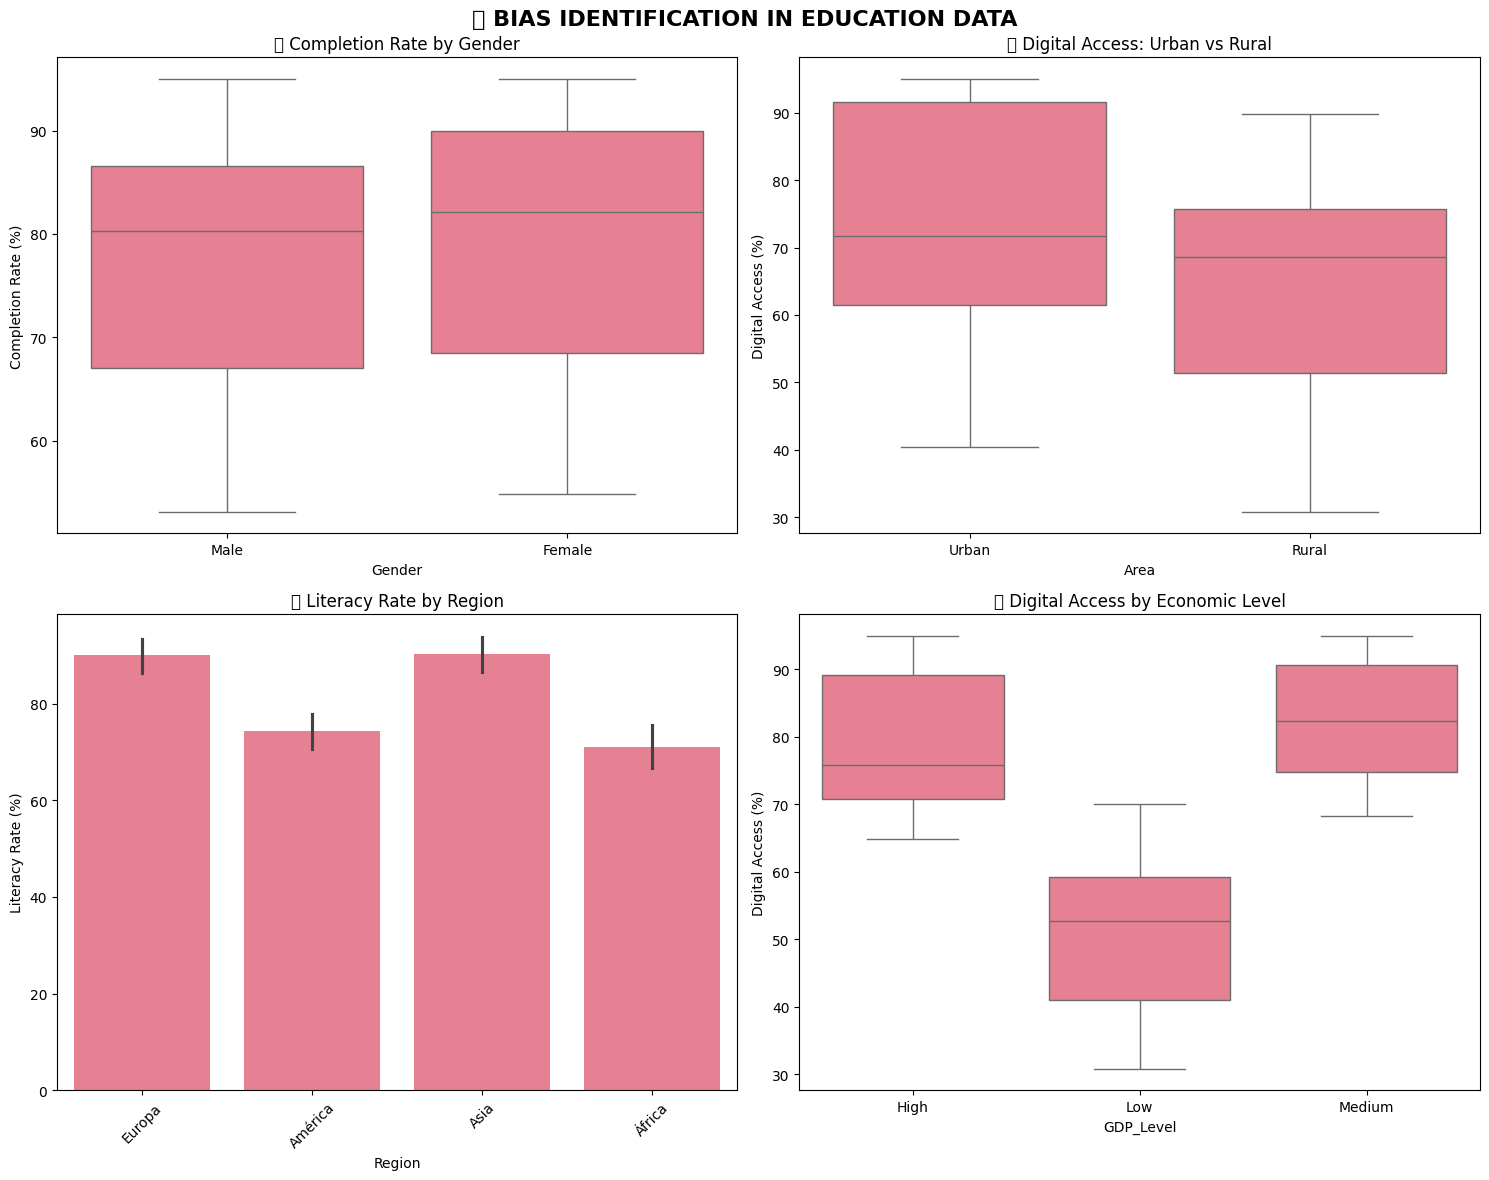

🎯 OBSERVACIONES INICIALES:
1. 👥 Gender gaps might exist in completion rates
2. 🏙️ Urban-rural digital divide clearly visible
3. 🌍 Regional disparities in education access
4. 💸 Economic level strongly correlates with digital access


In [7]:
# 2. Visualizaciones para identificar bias

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 BIAS IDENTIFICATION IN EDUCATION DATA', fontsize=16, fontweight='bold')

# Gráfico 1: Gender Bias
sns.boxplot(data=df, x='Gender', y='Completion_Rate', ax=axes[0,0])
axes[0,0].set_title('📚 Completion Rate by Gender')
axes[0,0].set_ylabel('Completion Rate (%)')

# Gráfico 2: Geographic Bias (Urban vs Rural)
sns.boxplot(data=df, x='Area', y='Digital_Access', ax=axes[0,1])
axes[0,1].set_title('💻 Digital Access: Urban vs Rural')
axes[0,1].set_ylabel('Digital Access (%)')

# Gráfico 3: Regional Bias
sns.barplot(data=df, x='Region', y='Literacy_Rate', ax=axes[1,0])
axes[1,0].set_title('📖 Literacy Rate by Region')
axes[1,0].set_ylabel('Literacy Rate (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 4: Economic Bias
sns.boxplot(data=df, x='GDP_Level', y='Digital_Access', ax=axes[1,1])
axes[1,1].set_title('💰 Digital Access by Economic Level')
axes[1,1].set_ylabel('Digital Access (%)')

plt.tight_layout()
plt.show()

print("🎯 OBSERVACIONES INICIALES:")
print("1. 👥 Gender gaps might exist in completion rates")
print("2. 🏙️ Urban-rural digital divide clearly visible")
print("3. 🌍 Regional disparities in education access")
print("4. 💸 Economic level strongly correlates with digital access")